In [22]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

drive.mount('/content/drive') #Mount the Google drive first

# Locate and read the dataset from the CSV file in Google drive
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/VehiclesLab8.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MPG,Cyl,Engine,HP,Weight,0to60,Year,Origin
0,14.0,8,350,165,4209,12,1972,US
1,31.9,4,89,71,1925,14,1980,Europe
2,17.0,8,302,140,3449,11,1971,US
3,15.0,8,400,150,3761,10,1971,US
4,30.5,4,98,63,2051,17,1978,US
5,23.0,8,350,125,3900,17,1980,US
6,13.0,8,351,158,4363,13,1974,US
7,14.0,8,440,215,4312,9,1971,US
8,25.4,5,183,77,3530,20,1980,Europe
9,37.7,4,89,62,2050,17,1982,Japan


In [2]:
df.dtypes #Remember, correlation works only with quantitative data

MPG       float64
Cyl         int64
Engine      int64
HP          int64
Weight      int64
0to60       int64
Year        int64
Origin     object
dtype: object

In [26]:
df1=df.drop(['Origin'],axis=1) #drop the Origian, which is categorical

df1.dtypes

# To view the correlation of the all the variables with every other variable:
df1.corr()#.round(4) # method='pearson'/'Kendall'/'spearman'
#Why doesn't "df.corr().round()" work?

# The PROBLEM with the correlation matrix is that the values get repeated in rows and in their corresponding column

,MPG,Cyl,Engine,HP,Weight,0to60,Year
MPG,1.000000,-0.941315,-0.929492,-0.922401,-0.910013,0.736410,0.891315
Cyl,-0.941315,1.000000,0.964986,0.905530,0.926630,-0.694109,-0.826126
Engine,-0.929492,0.964986,1.000000,0.945151,0.930535,-0.724372,-0.831617
HP,-0.922401,0.905530,0.945151,1.000000,0.860694,-0.833096,-0.858280
Weight,-0.910013,0.926630,0.930535,0.860694,1.000000,-0.516087,-0.731149
0to60,0.736410,-0.694109,-0.724372,-0.833096,-0.516087,1.000000,0.874552
Year,0.891315,-0.826126,-0.831617,-0.858280,-0.731149,0.874552,1.000000


In [27]:
# To view the correlation of a specific variable with another one:
data=df['MPG'].corr(df['Engine'])#.round(4)
data

-0.9294924007964663

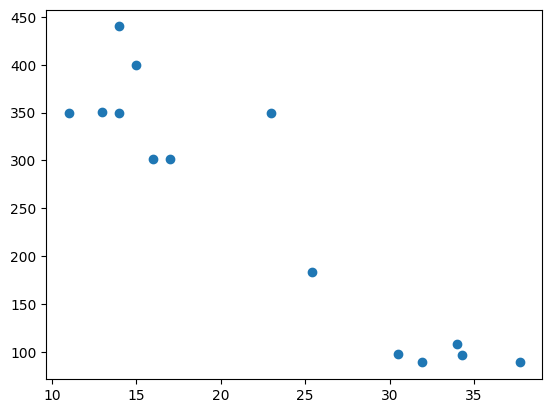

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['MPG'], df['Engine'])
plt.show()

In [16]:
# We can also DEFINE a function to compute Pearson Correlation on our own:
def Pearson_correlation(X,Y):
	if len(X)==len(Y): # Check if the two variables have same data length
		Sum_xy = sum((X-X.mean())*(Y-Y.mean())) # Find the the product of X-mean(X) and Y-mean(Y)
		Sum_x_squared = sum((X-X.mean())**2) # Compute the sum of the square of X-mean(X)
		Sum_y_squared = sum((Y-Y.mean())**2) # Calculate the sum of the square of Y-mean(Y)
		corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared) #Use the above three terms to find the Pearson correlation
	return corr # Return the Pearson correlation value

print(Pearson_correlation(df['MPG'],df['Engine']).round(4))


-0.9295


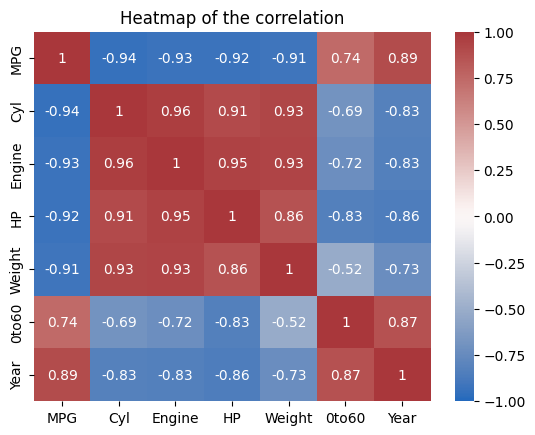

In [29]:
# Visualizing the correlation as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df1.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='vlag') #color map is used as blue for negative and red for positive
plt.title('Heatmap of the correlation')
plt.show()
# The PROBLEM with the correlation matrix is that the values get repeated in rows and in their corresponding columns

In [32]:
# Work done to pick the upper triangle of the correlation matrix
matrix=df1.corr() #Keep it as a matrix

# View each of the following THREE codelines, one by one, to understand why we use the last one
# mask=np.triu(matrix)
# mask=np.triu(np.ones_like(matrix))
mask=np.triu(np.ones_like(matrix,dtype=bool)) #Take only the upper triangle and change the values to boolean
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

<Axes: >

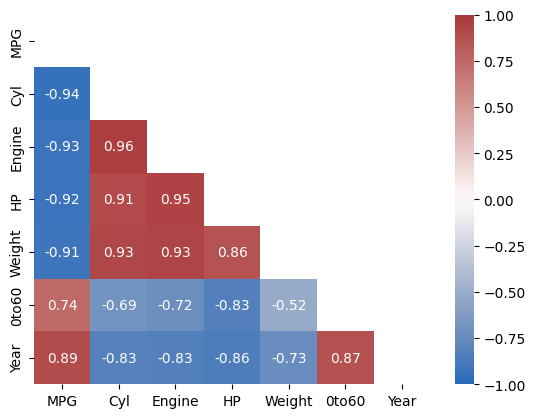

In [13]:
sns.heatmap(matrix,annot=True, vmin=-1, vmax=1, center=0,cmap='vlag', mask=mask)

In [34]:
# Analyzing the correlation data better, viewing conditional correlation
matrix
uMatrix=matrix.unstack()
uMatrix[uMatrix<-0.5] #Set the correlation condition HERE to view specifics

#*&*=============
# list=['Cyl','Engine','HP','Weight']
# for i in list:
#   print(df1['MPG'].corr(df1[i]))

MPG     Cyl      -0.941315
        Engine   -0.929492
        HP       -0.922401
        Weight   -0.910013
Cyl     MPG      -0.941315
        0to60    -0.694109
        Year     -0.826126
Engine  MPG      -0.929492
        0to60    -0.724372
        Year     -0.831617
HP      MPG      -0.922401
        0to60    -0.833096
        Year     -0.858280
Weight  MPG      -0.910013
        0to60    -0.516087
        Year     -0.731149
0to60   Cyl      -0.694109
        Engine   -0.724372
        HP       -0.833096
        Weight   -0.516087
Year    Cyl      -0.826126
        Engine   -0.831617
        HP       -0.858280
        Weight   -0.731149
dtype: float64

In [40]:
# Another example of PENGUINS dataset, taken from the Seaborn library

df2=sns.load_dataset('penguins')
print(df2.dtypes)

df2['bill_length_mm'].corr(df2['bill_depth_mm'])

# #*&*How to view correlation between multiple variables/features?
l=['bill_depth_mm','flipper_length_mm','body_mass_g']
for i in l:
  print("\n\tCorr between bill_length_mm with ",i,": ",df2['bill_length_mm'].corr(df2[i]))

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

	Corr between bill_length_mm with  bill_depth_mm :  -0.2350528703555326

	Corr between bill_length_mm with  flipper_length_mm :  0.6561813407464278

	Corr between bill_length_mm with  body_mass_g :  0.5951098244376303
